## Non-inertial reference frames

Let $Oxyz$ and $Ox'y'z'$ be two different reference frames that share the same center: the first is fixed, whereas the second rotates around an axis with angular velocity $\vec{\omega}(t)$. A mass point is moving freely in three-dimensional space. Let $\vec{r}(t)$ be the position of the mass point in the coordinates of the fixed frame and $\vec{r'}(t)$ be the position of the mass point in the coordinates of the rotating frame. Thus, we have the same position vector expressed in two different bases.

The relationship between $\vec{r}(t)$ and $\vec{r'}(t)$ is given by using the basis transformation matrix $M(t)$, which is a rotation matrix:

\begin{equation*}
\vec{r}(t) = M(t) \cdot \vec{r'}(t)
\end{equation*}

Differentiating this equation with respect to time gives the relationship between the velocities. Using the time derivative of the rotation matrix:

\begin{equation*}
\dot{M}(t) = \Omega(t) \cdot M(t)
\end{equation*}

And the angular velocity vector associated to the antisymmetric matrix $\Omega(t)$:

\begin{equation*}
\Omega(t) \cdot * = \vec{\omega}(t) \times *
\end{equation*}

We get:

\begin{equation*}
\vec{v}(t) = \omega (t) \times \vec{r}(t) + M(t) \cdot \vec{v'}(t)
\end{equation*}

Taking the time derivative again gives the equation for accelerations:

\begin{equation*}
\vec{a}(t) = \dot{\vec{\omega}}(t) \times \vec{r}(t) + 2 \vec{\omega}(t) \times \vec{v}(t) - \vec{\omega}(t) \times \vec{\omega}(t) \times \vec{r}(t) + M(t) \cdot \vec{a'}(t)
\end{equation*}

Multiplying by the mass gives the sum of all the forces acting on the material point, and the apparent forces emerge.
Now, we are going to apply these equations for a frame that is rotating around the z-axis.


In [1]:
# Importing libraries
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")

In [2]:
# Defining symbols
t = smp.symbols("t", real= True, positive= True)
omega, V, A = smp.symbols("omega V A", real= True, positive= True, constant= True)
x_prime = smp.Function("x'", real= True)(t)
y_prime = smp.Function("y'", real= True)(t)
z_prime = smp.Function("z'", real= True)(t)

The transformation matrix is the rotation matrix around the z-axis with an angle of $\omega t$:

\begin{equation*}
M(t) =
\begin{bmatrix}
\cos(\omega t) & - \sin (\omega t) & 0 \\
\sin (\omega t) & \cos(\omega t) & 0 \\
0 & 0 & 1
\end{bmatrix}
\end{equation*}

If $\omega$ is positive, the rotation is counterclockwise; if $\omega$ is negative, the rotation is clockwise.

In [3]:
# Change of basis matrix
M = smp.Matrix([(smp.cos(omega * t), - smp.sin(omega * t), 0),
                (smp.sin(omega * t), smp.cos(omega * t), 0),
                (0, 0, 1)])
M

Matrix([
[cos(omega*t), -sin(omega*t), 0],
[sin(omega*t),  cos(omega*t), 0],
[           0,             0, 1]])

In [4]:
# Position of the particle in the rotating coordinate system
r_prime = smp.Matrix([x_prime, y_prime, z_prime])
r_prime

Matrix([
[x'(t)],
[y'(t)],
[z'(t)]])

In [5]:
# Position of the particle in the fixed coordinate system
r = M * r_prime
r

Matrix([
[x'(t)*cos(omega*t) - y'(t)*sin(omega*t)],
[x'(t)*sin(omega*t) + y'(t)*cos(omega*t)],
[                                  z'(t)]])

In [6]:
# Defining the angular velocity vector
omega_vector = smp.Matrix([0, 0, omega])
omega_vector

Matrix([
[    0],
[    0],
[omega]])

In [7]:
# Velocity of the particle in the fixed coordinate system by using the formula
((omega_vector).cross(r) + M * (smp.diff(r_prime, t))).applyfunc(smp.simplify)

Matrix([
[-omega*(x'(t)*sin(omega*t) + y'(t)*cos(omega*t)) - sin(omega*t)*Derivative(y'(t), t) + cos(omega*t)*Derivative(x'(t), t)],
[ omega*(x'(t)*cos(omega*t) - y'(t)*sin(omega*t)) + sin(omega*t)*Derivative(x'(t), t) + cos(omega*t)*Derivative(y'(t), t)],
[                                                                                                    Derivative(z'(t), t)]])

In [8]:
# Velocity of the particle in the fixed coordinate system by direct differentiation
v = smp.diff(r, t).applyfunc(smp.simplify)
v

Matrix([
[-omega*x'(t)*sin(omega*t) - omega*y'(t)*cos(omega*t) - sin(omega*t)*Derivative(y'(t), t) + cos(omega*t)*Derivative(x'(t), t)],
[ omega*x'(t)*cos(omega*t) - omega*y'(t)*sin(omega*t) + sin(omega*t)*Derivative(x'(t), t) + cos(omega*t)*Derivative(y'(t), t)],
[                                                                                                        Derivative(z'(t), t)]])

In [9]:
# Acceleration of the particle in the fixed coordinate system by using the formula
((2 * omega_vector.cross(v)) - (omega_vector.cross(omega_vector.cross(r))) + M * (smp.diff(r_prime, t, 2))).applyfunc(smp.simplify)

Matrix([
[-omega**2*x'(t)*cos(omega*t) + omega**2*y'(t)*sin(omega*t) - 2*omega*sin(omega*t)*Derivative(x'(t), t) - 2*omega*cos(omega*t)*Derivative(y'(t), t) - sin(omega*t)*Derivative(y'(t), (t, 2)) + cos(omega*t)*Derivative(x'(t), (t, 2))],
[-omega**2*x'(t)*sin(omega*t) - omega**2*y'(t)*cos(omega*t) - 2*omega*sin(omega*t)*Derivative(y'(t), t) + 2*omega*cos(omega*t)*Derivative(x'(t), t) + sin(omega*t)*Derivative(x'(t), (t, 2)) + cos(omega*t)*Derivative(y'(t), (t, 2))],
[                                                                                                                                                                                                           Derivative(z'(t), (t, 2))]])

In [10]:
# Acceleration of the particle in the fixed coordinate system by direct differentiation
a = smp.diff(v, t).applyfunc(smp.simplify)
a

Matrix([
[-omega**2*x'(t)*cos(omega*t) + omega**2*y'(t)*sin(omega*t) - 2*omega*sin(omega*t)*Derivative(x'(t), t) - 2*omega*cos(omega*t)*Derivative(y'(t), t) - sin(omega*t)*Derivative(y'(t), (t, 2)) + cos(omega*t)*Derivative(x'(t), (t, 2))],
[-omega**2*x'(t)*sin(omega*t) - omega**2*y'(t)*cos(omega*t) - 2*omega*sin(omega*t)*Derivative(y'(t), t) + 2*omega*cos(omega*t)*Derivative(x'(t), t) + sin(omega*t)*Derivative(x'(t), (t, 2)) + cos(omega*t)*Derivative(y'(t), (t, 2))],
[                                                                                                                                                                                                           Derivative(z'(t), (t, 2))]])

We can see that the outputs coincide, verifying the correctness of the equations. Let's now define a law of motion in the rotating coordinate system:

\begin{equation*}
x'(t) = V t
\end{equation*}

\begin{equation*}
y'(t) = A \sin(2 \omega t)
\end{equation*}

\begin{equation*}
z'(t) = 0
\end{equation*}

Applying the formulas above, we obtain the same law of motion in the fixed coordinate system. 

In [11]:
# Defining the law of motion of the mass point in the rotating system
laws = [(x_prime, V * t), (y_prime, A * smp.sin(2 * omega * t)), (z_prime, 0)]

In [12]:
# Position in the fixed coordinate system
r.subs(laws).applyfunc(smp.simplify)

Matrix([
[(-2*A*sin(omega*t)**2 + V*t)*cos(omega*t)],
[ (2*A*cos(omega*t)**2 + V*t)*sin(omega*t)],
[                                        0]])

In [13]:
# Velocity in the fixed coordinate system
v.subs(laws).applyfunc(smp.simplify)

Matrix([
[-2*A*omega*sin(omega*t)*cos(2*omega*t) - A*omega*sin(2*omega*t)*cos(omega*t) - V*omega*t*sin(omega*t) + V*cos(omega*t)],
[-A*omega*sin(omega*t)*sin(2*omega*t) + 2*A*omega*cos(omega*t)*cos(2*omega*t) + V*omega*t*cos(omega*t) + V*sin(omega*t)],
[                                                                                                                     0]])

In [14]:
# Acceleration in the fixed coordinate system
a.subs(laws).applyfunc(smp.simplify)

Matrix([
[ 5*A*omega**2*sin(omega*t)*sin(2*omega*t) - 4*A*omega**2*cos(omega*t)*cos(2*omega*t) - V*omega**2*t*cos(omega*t) - 2*V*omega*sin(omega*t)],
[-4*A*omega**2*sin(omega*t)*cos(2*omega*t) - 5*A*omega**2*sin(2*omega*t)*cos(omega*t) - V*omega**2*t*sin(omega*t) + 2*V*omega*cos(omega*t)],
[                                                                                                                                        0]])

In [15]:
# Lambdifying into NumPy functions
x = smp.lambdify((A, omega, V, t), r.subs(laws)[0], modules= "numpy")
y = smp.lambdify((A, omega, V, t), r.subs(laws)[1], modules= "numpy")
v_x = smp.lambdify((A, omega, V, t), v.subs(laws).applyfunc(smp.simplify)[0], modules= "numpy")
v_y = smp.lambdify((A, omega, V, t), v.subs(laws).applyfunc(smp.simplify)[1], modules= "numpy")
a_x = smp.lambdify((A, omega, V, t), a.subs(laws).applyfunc(smp.simplify)[0], modules= "numpy")
a_z = smp.lambdify((A, omega, V, t), a.subs(laws).applyfunc(smp.simplify)[1], modules= "numpy")

In [16]:
# Defining constants of motion
A, omega, V = (3, np.pi, 1)

# Time array for plotting
t = np.linspace(0, 10, 1000)

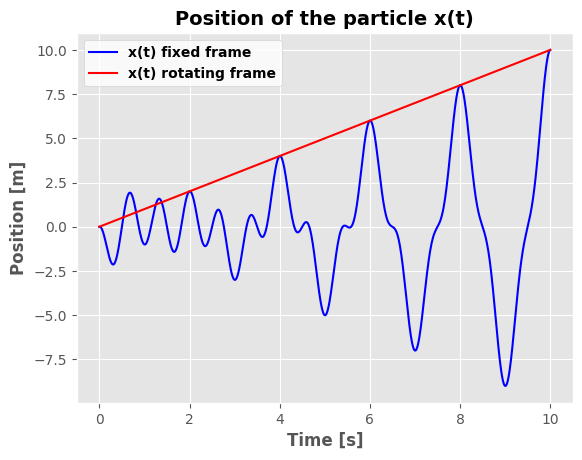

In [17]:
# Plotting x(t)
plt.plot(t, x(A, omega, V, t), label= "x(t) fixed frame", color= "blue")
plt.plot(t, V * t, label= "x(t) rotating frame", color= "red")
plt.title("Position of the particle x(t)", fontweight= "bold", fontsize= 14)
plt.xlabel("Time [s]", fontweight= "bold", fontsize= 12)
plt.ylabel("Position [m]", fontweight= "bold", fontsize= 12)
plt.legend(prop= {"weight": "bold", "size": 10}, facecolor= "white", loc= "upper left")

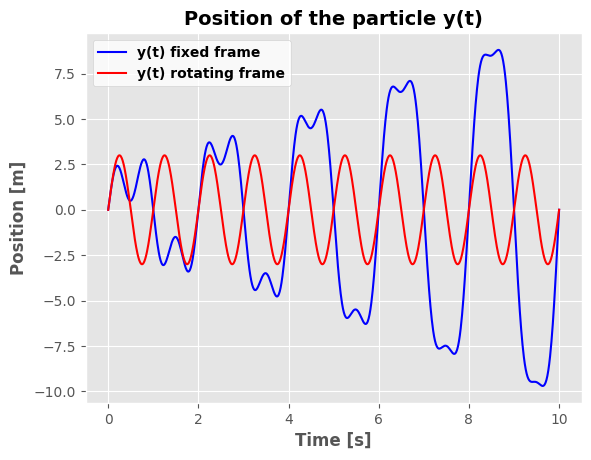

In [18]:
# Plotting y(t)
plt.plot(t, y(A, omega, V, t), label= "y(t) fixed frame", color= "blue")
plt.plot(t, A * np.sin(2 * omega * t), label= "y(t) rotating frame", color= "red")
plt.title("Position of the particle y(t)", fontweight= "bold", fontsize= 14)
plt.xlabel("Time [s]", fontweight= "bold", fontsize= 12)
plt.ylabel("Position [m]", fontweight= "bold", fontsize= 12)
plt.legend(prop= {"weight": "bold", "size": 10}, facecolor= "white", loc= "upper left")

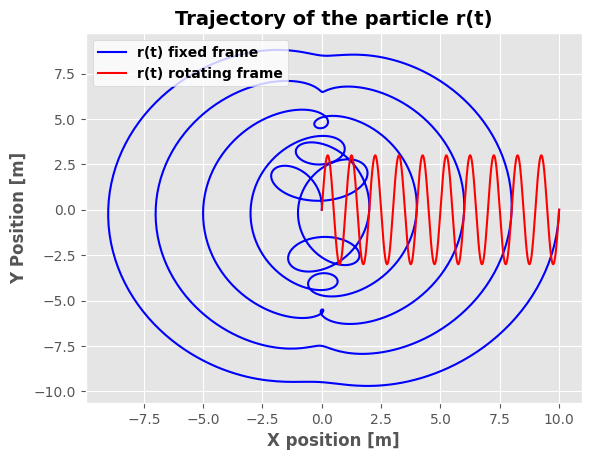

In [19]:
# Plotting the trajectories
plt.plot(x(A, omega, V, t), y(A, omega, V, t), label= "r(t) fixed frame", color= "blue")
plt.plot(V * t, A * np.sin(2 * omega * t), label= "r(t) rotating frame", color= "red")
plt.title("Trajectory of the particle r(t)", fontweight= "bold", fontsize= 14)
plt.xlabel("X position [m]", fontweight= "bold", fontsize= 12)
plt.ylabel("Y Position [m]", fontweight= "bold", fontsize= 12)
plt.legend(prop= {"weight": "bold", "size": 10}, facecolor= "white", loc= "upper left")